# Class 1: Revising Python basics using real data

&nbsp;
<div>
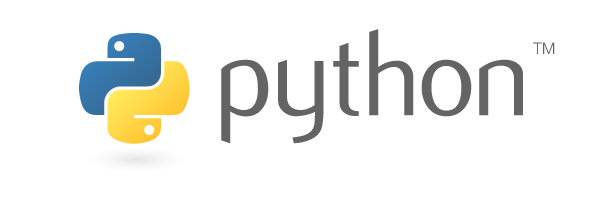
</div>
  
**Welcome to class 1!** Today, we'll be performing a simple experiment and analysing the results. This notebook will help you revise some of the basics of Python.

Form yourselves into groups of approximately 5 students. You can work through this notebook together.

It starts by loading python modules.

## Wait: what's a python module?

A module is a "code library" or "package", with a set of related python tools that you can reuse. (Technically, a module is a text file containing a set of python functions you want to include in your application. There's lots of online material on these.)

We load python modules using an `import` statement. This tells your current python session to load all or some functions from a module, as well as what names to use for those functions.

Every notebook that you run in this course is likely to start with importing modules.

## Wait again: what's a function?

A function is a block of code that performs a specific task. Python functions were covered in first year courses, including Biology 1C Discovery where you wrote a function to calculate Levenshtein distance.

We'll talk more about functions and how to "look inside" them and write your own, later.

## Load the modules

The python modules we'll use again and again in this course are:

- numpy, the fundamental library for scientific computing with Python.
- pandas, python data frames for holding and manipulating tables of data
- matplotlib, for creating visualisations in Python
- seaborn, statistical data visualisation library based on matplotlib
- scipy, for common statistical models and tests, also has many other algorithms for scientific computing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

## Wait, what's a data frame?

Data frames are the main tool for handling tables of data in Python. If you know a spreadsheet program like Microsoft Excel or Apple Numbers, a data frame is a bit like a single workbook in a spreadsheet.

&nbsp;
<div>
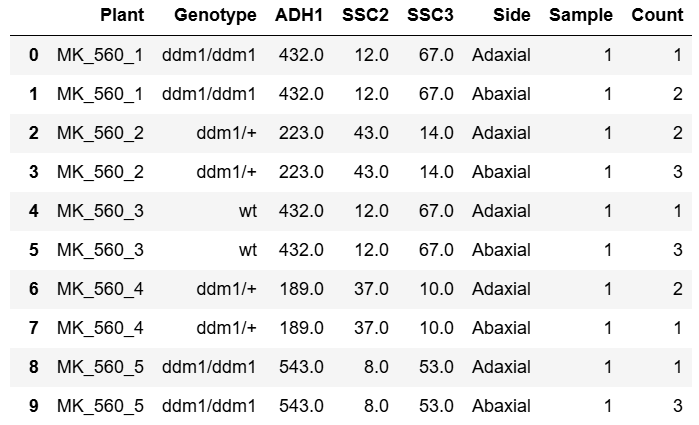
</div>
&nbsp;

A data frame is a rectangular table of data, with rows and columns. Each column must contain only one kind of data (numbers, strings, dates, etc.).

We will use data frames throughout this course, and you will become very familiar with them.

Here are some examples. Run the Python code to see what each data frame looks like.

In [ ]:
# example data frame with just numbers
df_simple = pd.DataFrame(
    {"a" : [4, 5, 6],
     "b" : [7, 8, 9] })

df_simple

In [ ]:
# example data frame with numbers and names - taken from https://en.wikipedia.org/wiki/List_of_universities_in_Scotland
df_scottishuniversities = pd.DataFrame(
    {"University" : ["St Andrews", "Glasgow", "Aberdeen", "Edinburgh"],
     "Founding_year" : [1413, 1451, 1495, 1582],
     "Total_students_2023" : [11895, 38125, 15455, 40625 ]
    })

df_scottishuniversities

The above examples created data frames using python code. Here, the data is typed out in a python-specific format within the python session ... it works but isn't very reliable.

Mostly in this course we will load data from files. We'll focus on loading from files in Class 2.

Data frames can be big. Run the code below. This loads the penguin data frame which has over 300 rows. On a regular computer, Python should be able to handle data frames containing several hundreds of thousands of rows!

In [ ]:
df_penguins = pd.read_csv('../Datasets/penguins.csv')

df_penguins

Now we have reminded ourselves what data frames are, we can collect some data within class and put it in a data frame.

## Planning the data collection

&nbsp;
<div>
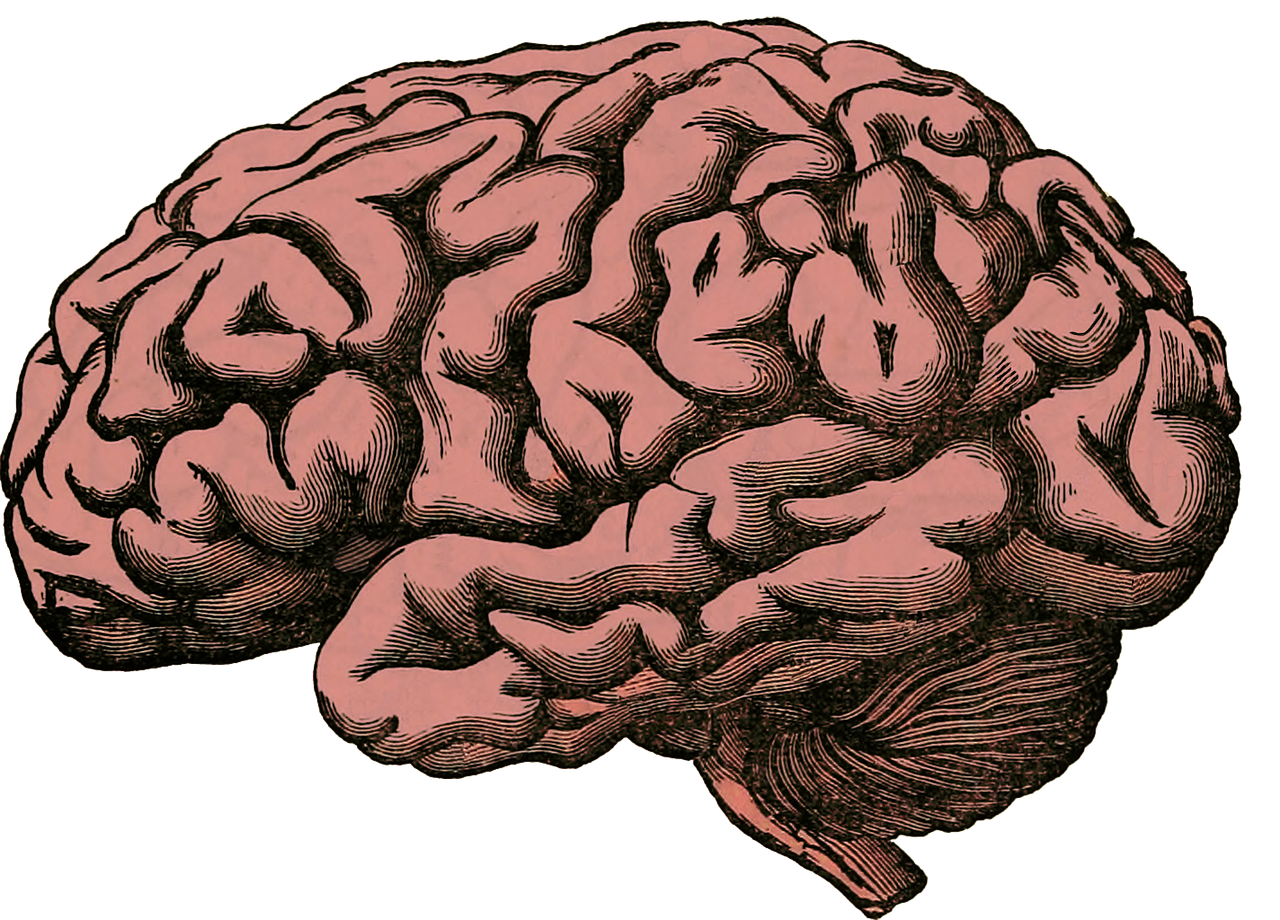
</div>

Much has been made of a link between brain size and intelligence. We will test this by correlating head circumference with the marks from the warm-up quiz.

Before you start, make a note of your **hypothesis** about such a link in the cell below.

> Write your hypothesis here.

## Example data

Before you create your own data, let's work through with example data. To do this, we will make a **dataframe** by combining five lists (group member, and then four sets of measurements). In this example, Charlie, Thu, Pakkapol, and Xiaofeng are the measurers for a group.

In [ ]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu', 'Pakkapol', 'Saima', 'Hillary', 'Faye', 'Xiao-feng']
Charlie_tape = [56,58,51,55,52,50,54,53,58,57]
Thu_tape = [56,57,52,56,51,52,55,54,57,57]
Pakkapol_tape = [55,59,52,58,51,53,55,55,57,56]
Xiaofeng_tape = [56,58,52,57,51,52,55,54,57,55]

We then combine these lists into a data frame.

In [ ]:
df = pd.DataFrame( { 
    "Group_member" : Group_member,
      "Charlie_tape" : Charlie_tape,
      "Thu_tape" : Thu_tape,
      "Pakkapol_tape" : Pakkapol_tape,
      "Xiaofeng_tape" : Xiaofeng_tape
})

df

We now have a pandas dataframe!  It has an index running along the left hand side and column names on the top.  Now let's look at some useful functions for checking and summarising the data.

## Check things look right

Trust nothing that you haven't checked!

First, let's check to see whether our dataframe has the number of rows and columns that we expect. We can do this by using `df.shape` which returns the number of rows and the number of columns inside a set of brackets.

In [ ]:
df.shape

We can also use `df.head()` to return the first five rows of the dataset.

In [ ]:
df.head()

Type the code `df.head(3)` in the cell below. What do you think the '3' is doing?

In [ ]:
df.head(3)

We can print the data frame using the print command:

In [ ]:
print(df)

Actually, jupyter by default prints a formatted version of the data frame as notebook output if you just put the data frame name in.

In [ ]:
df

To understand data, we also have to make quantitative summaries.

`df.describe()` is a really nice, simple way of obtaining some summary statistics. Have a look at the output - do you understand what each row is calculating? Have a look at the pandas documentation to find out more: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
df.describe()

You can also get just single statistics. Here are some examples:

In [ ]:
df.mean() # returns the mean of each column

**OH NO!!!** You probably saw a long and difficult to understand error message when you ran that. You will see many more error messages during this course and learn how to respond.

The error message probably ended in:

```TypeError: Could not convert [...] to numeric```

Well, one of the data frame columns is full of names, and you can't take the mean of some names, you can only take means of numbers or numeric values. You could read the documentation of the `DataFrame.mean` function at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

For now, you can use the argument `numeric_only = True` to calculate the mean only for numeric columns.

In [ ]:
df.mean(numeric_only = True) # returns the mean of each numeric column

Try calculating the median and the maximum/max values of the numeric columns.

In [ ]:
df.median(numeric_only = True) # returns the median of each numeric column

In [ ]:
df.max(numeric_only = True) # returns the max of each numeric column

## Analyse the results

First, let's look to see if we have reliable measurements. We can do this by plotting each set of measurements against the others. Let's use a pair plot from seaborn to do this.

In [ ]:
sns.pairplot(df, kind = 'reg');

The code above has produced regression plots for each pair of numerical variables. Have a look at the output. Are there big differences between the measurements made by each of the measurers?

To test for a link between head circumference and quiz score, we need to collect the measurements from the whole class. First, let's average the measurements and make a new column of this in the dataframe.

In [ ]:
df['Av_diameter'] = df[['Charlie_tape','Thu_tape', 'Pakkapol_tape', 'Xiaofeng_tape']].mean(axis = 1)

<div class="alert alert-block alert-info">
<b>Tip:</b> The (axis = 1) statement in the code above tells Python in which direction to perform the operation. axis = 1 tells Python to perform the operation (in this case calculating the mean) by moving across the columns. axis = 0 tells Python to perform the operation by moving down the rows.
    
    | Column A | Column B |
    -----------------------
    | 0.626386 | 1.523251 |---- axis = 1 ----->
    ----------------------- 
         |         
         | axis = 0  
         ↓         
</div>

To check that the column has been added, view the data frame again.

In [ ]:
df

## Collect your Data

<div>
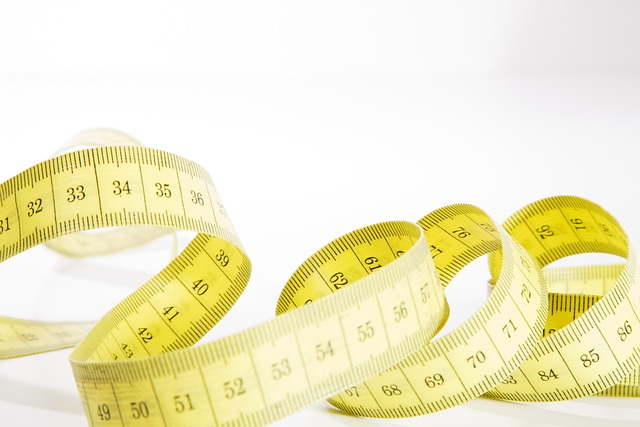
</div>
&nbsp;

At this point, each group of five should have been given a tape measure. Choose two people in your group to be the 'measurers'. The measurers should each measure the head circumference of everyone in the group. When you take your measurements, wrap the tape measure around just above the ears.

We will hand out a paper form for you to fill in the measurements

You should all have your head measured **twice**.

## Enter the data into Python

Now it is time to enter your group data into Python. We will take the approach in the example, and make a new dataframe by combining lists (group member, and then the two sets of measurements). In this example, Alice and Thibauld are the measurers. 
In class, simply replace the numbers and names in the cell below with your own.

**Make sure that each measurer measures every head! If your lists of measurements or names have different lengths, it will not create a data frame.**

Please ask a demonstrator for help if anything is not clear.

In [ ]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu']
Alice_tape = [56,58,51,55,52]
Thibauld_tape = [56,57,52,56,51]

In [ ]:
df_measured = pd.DataFrame( { 
    "Group_member" : Group_member,
      "Alice_tape" : Alice_tape,
      "Thibauld_tape" : Thibauld_tape
})

df_measured

Check that the data frame you've created is the right shape by writing code in the cell below.

In [ ]:
df_measured.shape

You can also do some numerical summaries of the data frame.

In [ ]:
df_measured.describe()

Try making a pairplot to view the measurements.

In [ ]:
sns.pairplot(df_measured, kind = 'reg');

## Demonstrators will gather the data

The forms with measurements will be gathered by demonstrators, along with the quiz marks.  These will be kept anonymous!

We will take a break now, then have our first Data Science in Biology talk, and after than analyse the data gathered.

## Is there a correlation between head circumference and quiz score?

The demonstrators will enter all the data into an excel spreadsheet document, and upload it to the Learn website for Class 1. You will need to download the file 'DExB2_class1_data_2025.xlsx' from Learn, and then upload it to your Noteable in the 2025-DExB2/Week_01 folder.

*If you upload it to a different folder, the code below won't know where to find the file.*

When the file has uploaded, you can start to look at the data.

The columns are Student_Group, Student_Number, Head_Size_cm and Quiz_Score.

In [ ]:
df_all = pd.read_excel('DExB2_class1_data_2025.xlsx') # loads the dataframe into Python

In [ ]:
df_all.head()

## Is there a correlation?

We are now ready to see if there is a correlation between head size and the ability to recall data analysis skills from last year.

Plot one against the other using `sns.regplot(data = df_all, x = 'Head_Size_cm', y = 'Quiz_Score');`. What does the graph suggest?

In [ ]:
sns.regplot(data = df_all, x = 'Head_Size_cm', y = 'Quiz_Score');

## Congratulations!

You have now completed the first notebook for Data Exploration in Biology!

We hope you learned something, and that you continue to ask questions.

The file `Class_1_homework.ipynb` contains this class's homework, that focuses on understanding how Python commands work, including by breaking things and then fixing them.


If you have more time in class or homework, try checking if the data are normally distributed below.

## Further exploration: Are the data normally distributed?

As we look for a correlation between head circumference (Head_Size_cm) and quiz score (Quiz_Score), let's also check our variables are normally distributed. This is important because some of the statistical tests we might want to use on our data make this assumption, so it is important to check!

Let's start with head circumference. First, we'll plot a histogram to see what the distribution of Head_Size_cm looks like.

In [ ]:
sns.histplot(data = df_all, x = 'Head_Size_cm');

Have a look at the graph above. Do the data look normally distributed?

Now let's test this formally with a statistical test called the Shapiro-Wilk test. Type the null hypothesis of this test in the cell below (you may need to look this up).

> The sample is normally distributed.

The following code performs the Shapiro-Wilk test (`shapiro`) on one set of measurements. Have a look through it and make sure you understand what the code is doing. Ask a demonstrator if anything is unclear.

In [ ]:
stat, p = shapiro(df_all['Head_Size_cm'])
print(f'Statistics = {stat:.3f}, p = {p:.3f}')

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject null hypothesis)')
else:
	print('Sample does not look Gaussian (reject null hypothesis)')

Now have a go plotting a histogram of the quiz scores. Then, use the shapiro test to formally check for normality.

In [ ]:
sns.histplot(data = df_all, x = 'Quiz_Score');

In [ ]:
stat, p = shapiro(df_all['Quiz_Score'])
print(f'Statistics = {stat:.3f}, p = {p:.3f}')

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject null hypothesis)')
else:
	print('Sample does not look Gaussian (reject null hypothesis)')